## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyod.models.suod import SUOD, LOF, COPOD, IForest

c:\Users\peter\anaconda3\envs\HANS\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\peter\anaconda3\envs\HANS\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\peter\anaconda3\envs\HANS\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\peter\anaconda3\envs\HANS\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ImportError: Numba needs NumPy 1.21 or less

# Nem Imports

In [ ]:
import random

## Helper Functions

In [ ]:
def get_avgs(arr, fps=30):
    # average the values at some fps rate
    r = arr.size % fps
    cropped = arr[:arr.size - r].reshape(-1, fps)
    avgs = np.mean(cropped, axis=1)
    return avgs

def plot_figs(arr, xlabel, ylabel, change_ticks=False, vlines=None):
    
    cols = ['Displacement From Mean Position', 'Change in Angle per Frame']
    
    differences = np.ediff1d(arr, to_begin=0)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
    
    for ax, col in zip(axes[0], cols):
        ax.set_title(col)
        
    for i in range(2):
        for j in range(2):
            if j == 0:
                axes[i, j].set_ylabel(f'{ylabel} (degrees)')
            else:
                axes[i, j].set_ylabel(f'Difference in {ylabel} (degrees)')
            axes[i, j].set_xlabel(f'nth {xlabel}')
            if change_ticks:
                axes[i, j].set_xticks(np.arange(arr.size))
    
    axes[0, 0].scatter(np.arange(arr.size), arr, color="b", alpha=0.5)
    axes[0, 1].scatter(np.arange(differences.size), differences, color="r", alpha=0.5)
    axes[1, 0].plot(np.arange(arr.size), arr, color="b", alpha=0.5)
    axes[1, 1].plot(np.arange(differences.size), differences, color="r", alpha=0.5)
    
    
    if vlines != None:
        for i in range(2):
            for j in range(2):
                axes[i, j].axvline(vlines[0], color ='green', lw = 2, alpha = 0.75)
                axes[i, j].axvline(vlines[1], color ='green', lw = 2, alpha = 0.75)

    fig.tight_layout()
    plt.show()
    
# initialized a group of outlier detectors for acceleration
detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
                 LOF(n_neighbors=25), LOF(n_neighbors=35),
                 COPOD(), IForest(n_estimators=100),
                 IForest(n_estimators=200)]

def show_outliers(X_train, fps=30):
    clf = SUOD(base_estimators=detector_list, n_jobs=1, combination='average',
               verbose=False)
    clf.fit(X_train)
    outliers = np.argwhere(clf.labels_).ravel()
    scores = clf.decision_scores_
    outlier_scores = scores[outliers]
    plt.barh(outliers, outlier_scores)
    plt.title("%d FPS" % fps)
    plt.xlabel("Confidence")
    plt.ylabel("Frame Number")
    plt.show()

# Gernerate Pseudo Data

In [ ]:
pseudo_pitch = np.array([])
pseudo_roll = np.array([])
pseudo_yaw = np.array([])
for i in range(600):
    pseudo_pitch = np.append(pseudo_pitch, random.uniform(0, 20))
    pseudo_roll = np.append(pseudo_roll, random.uniform(-3, 1))
    pseudo_yaw = np.append(pseudo_yaw, random.uniform(2, -4))
    

In [ ]:
print(pseudo_pitch)

[1.32834644e+01 1.66598977e+00 1.01295637e+01 5.94115676e+00
 3.79115998e+00 9.57822322e+00 1.97908388e+01 7.10919215e+00
 1.18775924e+01 3.64331207e+00 1.32621629e+01 2.99441993e+00
 1.97129168e+01 1.84809696e-02 1.27206345e+01 8.86287391e+00
 1.42800276e+01 9.78924623e-01 7.43397117e+00 1.33660695e+01
 1.68399162e+01 6.16718481e+00 1.00342603e+01 7.27519099e+00
 1.93754349e+01 1.38191625e+01 1.37097600e+01 1.47176780e+01
 8.32541543e+00 1.05200380e+01 1.49586872e+01 3.61548062e+00
 1.12322366e+01 1.86018883e+01 1.50588091e+01 1.44380131e+01
 1.16538737e+01 6.01849275e+00 1.67120642e+01 1.32022008e+01
 2.87224670e-01 2.02327927e+00 1.79944711e+01 1.07797036e+01
 2.55356534e+00 1.94182981e+01 1.58257528e-01 1.69903541e+01
 5.06571088e+00 1.04798764e+01 6.08264359e+00 9.96094603e+00
 3.40350834e+00 1.32153522e+01 1.51240041e+01 1.37317820e+01
 1.93100468e+01 9.84031789e+00 1.27930985e-03 4.62304360e+00
 8.78456650e+00 4.03291688e+00 1.90650793e+01 1.90193163e+01
 6.24717868e+00 4.014325

In [ ]:
np.savetxt("asad/pitch.txt", pseudo_pitch)
np.savetxt("asad/roll.txt", pseudo_roll)
np.savetxt("asad/yaw.txt", pseudo_yaw)

## Data

In [ ]:
BASE_DIR = os.path.join('..', '..', 'test_videos')
arrays_dir = os.path.join(BASE_DIR, "results_arrays")

t1 = os.path.join(arrays_dir, 'Test1_tilts.npy')
p1 = os.path.join(arrays_dir, 'Test1_pans.npy')
t2 = os.path.join(arrays_dir, 'Test2_tilts.npy')
p2 = os.path.join(arrays_dir, 'Test2_pans.npy')

t1 = np.load(t1).ravel()
p1 = np.load(p1).ravel()
t2 = np.load(t2).ravel()
p2 = np.load(p2).ravel()

In [ ]:
BASE_DIR = ""
pitch = os.path.join(BASE_DIR, "asad", "pitch.txt")
roll = os.path.join(BASE_DIR, "asad", "roll.txt")
yaw = os.path.join(BASE_DIR, "asad", "yaw.txt")

pitch = np.loadtxt(pitch)
roll = np.loadtxt(roll)
yaw = np.loadtxt(yaw)

## Visualization

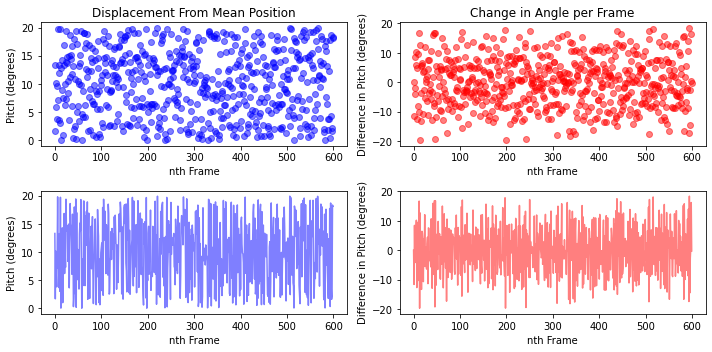

In [ ]:
plot_figs(pitch, 'Frame', 'Pitch')

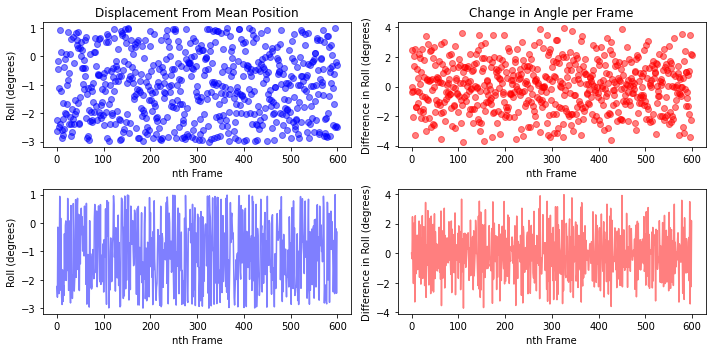

In [ ]:
plot_figs(roll, 'Frame', 'Roll')

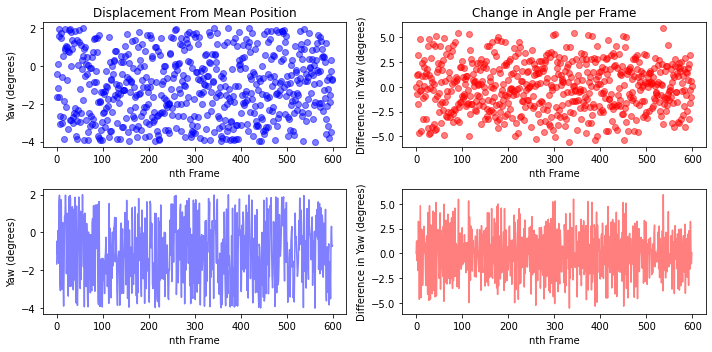

In [ ]:
plot_figs(yaw, 'Frame', 'Yaw')

## Anomaly Detection

In [ ]:
t1_diff = np.ediff1d(t1, to_begin=0)
p1_diff = np.ediff1d(p1, to_begin=0)
t2_diff = np.ediff1d(t2, to_begin=0)
p2_diff = np.ediff1d(p2, to_begin=0)

t1_avg30 = get_avgs(t1)
p1_avg30 = get_avgs(p1)
t2_avg30 = get_avgs(t2)
p2_avg30 = get_avgs(p2)

t1_avg30_diff = np.ediff1d(t1_avg30, to_begin=0)
p1_avg30_diff = np.ediff1d(p1_avg30, to_begin=0)
t2_avg30_diff = np.ediff1d(t2_avg30, to_begin=0)
p2_avg30_diff = np.ediff1d(p2_avg30, to_begin=0)

t1_avg15 = get_avgs(t1, 15)
p1_avg15 = get_avgs(p1, 15)
t2_avg15 = get_avgs(t2, 15)
p2_avg15 = get_avgs(p2, 15)

t1_avg15_diff = np.ediff1d(t1_avg15, to_begin=0)
p1_avg15_diff = np.ediff1d(p1_avg15, to_begin=0)
t2_avg15_diff = np.ediff1d(t2_avg15, to_begin=0)
p2_avg15_diff = np.ediff1d(p2_avg15, to_begin=0)

In [ ]:
pitch_diff = np.ediff1d(pseudo_pitch, to_begin=0) 
roll_diff = np.ediff1d(pseudo_roll, to_begin=0) 
yaw_diff = np.ediff1d(pseudo_yaw, to_begin=0) 

In [ ]:
X_trains = [
    # np.vstack((t1, t1_diff, p1, p1_diff)).T,
    # np.vstack((t2, t2_diff, p2, p2_diff)).T,
    # np.vstack((t1, t1_diff)).T,
    # np.vstack((t2, t2_diff)).T,
    
    # np.vstack((t1_avg30, t1_avg30_diff, p1_avg30, p1_avg30_diff)).T,
    # np.vstack((t2_avg30, t2_avg30_diff, p2_avg30, p2_avg30_diff)).T,
    # np.vstack((t1_avg30, t1_avg30_diff)).T,
    # np.vstack((t2_avg30, t2_avg30_diff)).T,
    
    # np.vstack((t1_avg15, t1_avg15_diff, p1_avg15, p1_avg15_diff)).T,
    # np.vstack((t2_avg15, t2_avg15_diff, p2_avg15, p2_avg15_diff)).T,
    # np.vstack((t1_avg15, t1_avg15_diff)).T,
    # np.vstack((t2_avg15, t2_avg15_diff)).T,
    
    np.vstack((pseudo_pitch, pseudo_roll, pseudo_yaw, pitch_diff, roll_diff, yaw_diff)).T
]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


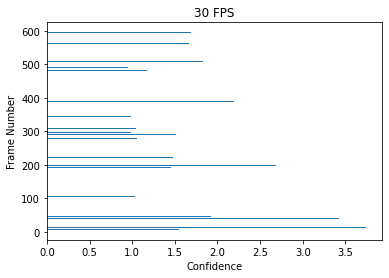

In [ ]:
i = 0
show_outliers(X_trains[i])